In [24]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
with open(os.path.join('../data/APP-350_v1.0/original_documents/', '3.html'), 'r') as f:
    text = f.read()
    
print(re.sub(r'\<.*\>','',text))

Automatic Call Recorder - Privacy Policy
​
This document clarifies how user data and any sensitive information is handled in the app.
​
Recording Call - Microphone
We do not hold any recordings or user information on our own servers.
The app “Automatic Call Recorder” records phone calls. All recorded calls are recorded on the phone using the microphone on the device. The recorded files and related notes are stored on the phone’s storage and NO server is involved with recording phone calls. The recorded calls are not stored on our own server and can only be stored locally or on a third party cloud storage service such as Google Drive or Dropbox.
​
Storage
The app requests permission to access the phone’s storage only in order to store the recorded calls and play the recorded files afterwards. The app does not access any other files nor excess user’s photos.
​
Contacts
The app accesses the contacts on the phone in order to display the contacts that were recorded and so the app can record

In [86]:
with open(os.path.join(data_path, 'policy_10.yml'), 'r') as f:
    text = f.read()
    
print(text)

policy_id: 10
policy_name: CheetahMobileBatteryDoctorBrowser
policy_type: TEST
contains_synthetic: false
segments:
- segment_id: 0
  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More
    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News
    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior
    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog
    Security Topics CEO Talks Press Release About Company Information Investor Relations
    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn
    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that
    privacy is significant. This Privacy Policy ("Policy") applies to your use of
    the Battery Doctor applications on all platforms (the "Application").
  annotations: []
  sentences: []
- segment_id: 1
  segment_text: Cheetah Mobile Inc. ("us" or "we") has created this Policy t

In [10]:
data_path = '../data/APP-350_v1.0/annotations/'
sample_policy = 'policy_1.yml'

with open(os.path.join(data_path, sample_policy), 'r') as f:
    text = f.readlines()

In [14]:
text

['policy_id: 1\n',
 'policy_name: 6677G\n',
 'policy_type: TEST\n',
 'contains_synthetic: false\n',
 'segments:\n',
 '- segment_id: 0\n',
 '  segment_text: PRIVACY POLICY This privacy policy (hereafter referred to as the "Privacy\n',
 '    Policy") is applicable to our websites, apps and to all games and other activities(hereafter\n',
 '    referred to as the "our products") that are offered by us on or through our products.\n',
 '    Tiny Piece, having its registered office at Ajeltake Road, Ajeltake Island, Majuro,\n',
 '    Republic of the Marshall Island MH 96960 (hereafter referred to as "6677g"). 6677g\n',
 "    may use affiliates' or reputable third parties' services for the processing of\n",
 '    personal data collected on or through our products. By using or accessing our\n',
 '    products, you are accepting the practices described in this Privacy Policy.\n',
 '  annotations: []\n',
 '  sentences: []\n',
 '- segment_id: 1\n',
 '  segment_text: 1. ABOUT OUR PRODUCTS 1.1 Our p

In [34]:
cols = ['PERFORMED','NOT_PERFORMED']
lc = 0
prac_dict = {}
for line in text:
    l = line.strip()
    
    if 'practice:' in l:
        prac_name = l.split(':')[1].strip()
        lm = text[lc+1].strip()
        mod_name = lm.split(':')[1].strip()
        print(prac_name, mod_name)
        if prac_name in prac_dict:
            if mod_name=='PERFORMED':
                prac_dict[prac_name][0] += 1
            if mod_name=='NOT_PERFORMED':
                prac_dict[prac_name][1] += 1
        else:
            if mod_name=='PERFORMED':
                prac_dict[prac_name] = [1,0]
            if mod_name=='NOT_PERFORMED':
                prac_dict[prac_name] = [0, 1]
    lc+=1

prac_dict

Identifier_Cookie_or_similar_Tech_1stParty PERFORMED
Identifier_IP_Address_1stParty PERFORMED
Identifier_Cookie_or_similar_Tech_1stParty PERFORMED
Identifier_IP_Address_1stParty PERFORMED
Identifier_IP_Address_1stParty PERFORMED
Identifier_Cookie_or_similar_Tech_1stParty PERFORMED
Identifier_IP_Address_1stParty PERFORMED
Identifier_IP_Address_1stParty PERFORMED
Identifier_Cookie_or_similar_Tech_1stParty PERFORMED
Identifier_Cookie_or_similar_Tech_1stParty PERFORMED
Identifier_Cookie_or_similar_Tech_1stParty PERFORMED
Identifier_Cookie_or_similar_Tech_1stParty PERFORMED
Identifier_Cookie_or_similar_Tech_3rdParty PERFORMED
Identifier_Cookie_or_similar_Tech_3rdParty PERFORMED
Identifier_Cookie_or_similar_Tech_3rdParty PERFORMED
Identifier_Cookie_or_similar_Tech_3rdParty PERFORMED
Identifier_Cookie_or_similar_Tech_3rdParty PERFORMED
Identifier_Cookie_or_similar_Tech_3rdParty PERFORMED
Demographic_3rdParty PERFORMED
Demographic_Age_3rdParty PERFORMED
Demographic_3rdParty PERFORMED
Demograph

{'Contact_E_Mail_Address_1stParty': [13, 0],
 'Demographic_3rdParty': [2, 0],
 'Demographic_Age_1stParty': [2, 0],
 'Demographic_Age_3rdParty': [2, 0],
 'Identifier_Cookie_or_similar_Tech_1stParty': [12, 0],
 'Identifier_Cookie_or_similar_Tech_3rdParty': [6, 0],
 'Identifier_IP_Address_1stParty': [5, 0]}

In [45]:
cols = ['PERFORMED','NOT_PERFORMED']
files = os.listdir(data_path)
policy_dict={}
for file in files:
    with open(os.path.join(data_path, file), 'r') as f:
        text = f.readlines()
    lc = 0
    prac_dict = {}
    for line in text:
        l = line.strip()
        if 'practice:' in l:
            prac_name = l.split(':')[1].strip()
            lm = text[lc+1].strip()
            mod_name = lm.split(':')[1].strip()
            #print(prac_name, mod_name)
            if prac_name in prac_dict:
                if mod_name=='PERFORMED':
                    prac_dict[prac_name][0] += 1
                if mod_name=='NOT_PERFORMED':
                    prac_dict[prac_name][1] += 1
            else:
                if mod_name=='PERFORMED':
                    prac_dict[prac_name] = [1,0]
                if mod_name=='NOT_PERFORMED':
                    prac_dict[prac_name] = [0, 1]
        lc+=1
    policy_dict[file]=prac_dict

#prac_dict

In [50]:
def performed_action(lst):
    try:
        return lst[0]
    except:
        return np.nan
    
def not_performed_action(lst):
    try:
        return lst[1]
    except:
        return np.nan

In [51]:
df_policies = pd.DataFrame(policy_dict)
df_policies.head()

,policy_1.yml,policy_10.yml,policy_100.yml,policy_101.yml,policy_102.yml,policy_103.yml,policy_104.yml,policy_105.yml,policy_106.yml,policy_107.yml,...,policy_90.yml,policy_91.yml,policy_92.yml,policy_93.yml,policy_94.yml,policy_95.yml,policy_96.yml,policy_97.yml,policy_98.yml,policy_99.yml
Contact_1stParty,NaN,NaN,"[2, 0]","[2, 2]",NaN,NaN,NaN,NaN,NaN,NaN,...,"[3, 0]",NaN,NaN,"[14, 0]","[2, 0]",NaN,"[3, 0]",NaN,NaN,NaN
Contact_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[0, 2]","[4, 0]",NaN,NaN,NaN,NaN,NaN,NaN,"[4, 0]",NaN
Contact_Address_Book_1stParty,NaN,NaN,"[3, 0]","[7, 2]",NaN,NaN,NaN,NaN,"[2, 0]",NaN,...,"[3, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_Address_Book_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_City_1stParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[2, 0]",NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_performed = df_policies.copy()
df_not_performed = df_policies.copy()

for col in df_policies.columns:
    df_performed[col] = df_performed[col].apply(performed_action)
    df_not_performed[col] = df_not_performed[col].apply(not_performed_action)

In [65]:
df_performed.head()

,policy_1.yml,policy_10.yml,policy_100.yml,policy_101.yml,policy_102.yml,policy_103.yml,policy_104.yml,policy_105.yml,policy_106.yml,policy_107.yml,...,policy_90.yml,policy_91.yml,policy_92.yml,policy_93.yml,policy_94.yml,policy_95.yml,policy_96.yml,policy_97.yml,policy_98.yml,policy_99.yml
Contact_1stParty,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,14.0,2.0,NaN,3.0,NaN,NaN,NaN
Contact_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
Contact_Address_Book_1stParty,NaN,NaN,3.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_Address_Book_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_City_1stParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_performed.head()

,policy_1.yml,policy_10.yml,policy_100.yml,policy_101.yml,policy_102.yml,policy_103.yml,policy_104.yml,policy_105.yml,policy_106.yml,policy_107.yml,...,policy_90.yml,policy_91.yml,policy_92.yml,policy_93.yml,policy_94.yml,policy_95.yml,policy_96.yml,policy_97.yml,policy_98.yml,policy_99.yml
Contact_1stParty,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,14.0,2.0,NaN,3.0,NaN,NaN,NaN
Contact_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
Contact_Address_Book_1stParty,NaN,NaN,3.0,7.0,NaN,NaN,NaN,NaN,2.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_Address_Book_3rdParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_City_1stParty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
performed_totals.index == not_performed_totals.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [72]:
performed_totals = (df_performed>0).sum(axis=1)
not_performed_totals = (df_not_performed>0).sum(axis=1)

In [76]:
df_totals = pd.DataFrame({'Performed': performed_totals, 'Not Performed': not_performed_totals})
df_totals.head()

,Performed,Not Performed
Contact_1stParty,103,30
Contact_3rdParty,17,6
Contact_Address_Book_1stParty,85,35
Contact_Address_Book_3rdParty,6,1
Contact_City_1stParty,35,10


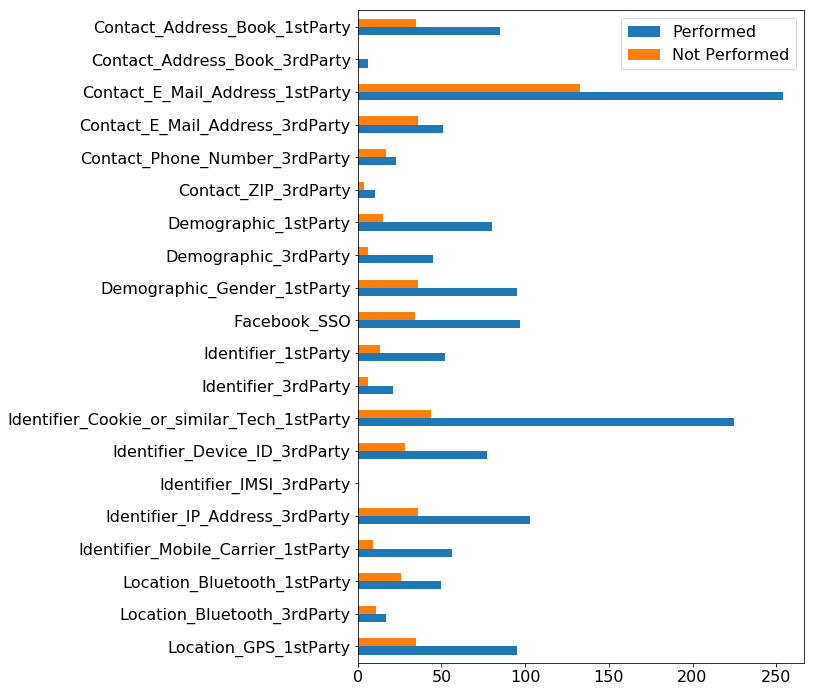

In [97]:
df_totals.sample(20).sort_index(ascending=False).plot(kind='barh', figsize=(8,12), fontsize=16)
plt.legend(fontsize=16)

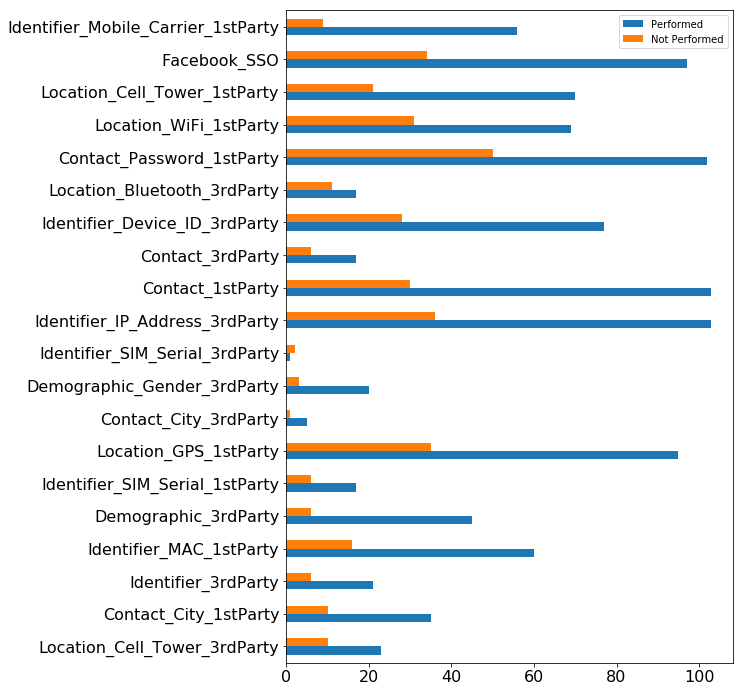

In [94]:
df_totals.sample(20).plot(kind='barh', figsize=(8,12), fontsize=16)

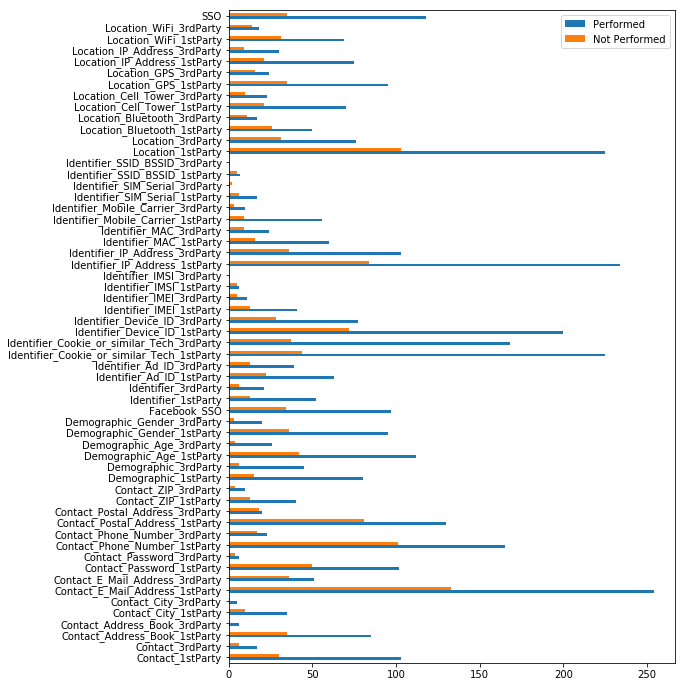

In [84]:
df_totals.plot(kind='barh', figsize=(8,12))

In [77]:
len(df_totals)

58

In [63]:
(~df_performed.isna()).sum(axis=1)

Contact_1stParty                              109
Contact_3rdParty                               21
Contact_Address_Book_1stParty                  96
Contact_Address_Book_3rdParty                   6
Contact_City_1stParty                          36
Contact_City_3rdParty                           6
Contact_E_Mail_Address_1stParty               285
Contact_E_Mail_Address_3rdParty                75
Contact_Password_1stParty                     116
Contact_Password_3rdParty                       9
Contact_Phone_Number_1stParty                 198
Contact_Phone_Number_3rdParty                  34
Contact_Postal_Address_1stParty               161
Contact_Postal_Address_3rdParty                36
Contact_ZIP_1stParty                           40
Contact_ZIP_3rdParty                           13
Demographic_1stParty                           81
Demographic_3rdParty                           47
Demographic_Age_1stParty                      113
Demographic_Age_3rdParty                       29


In [46]:
len(policy_dict)

350

In [47]:
policy_dict['policy_100.yml']

{'Contact_1stParty': [2, 0],
 'Contact_Address_Book_1stParty': [3, 0],
 'Contact_E_Mail_Address_1stParty': [26, 0],
 'Contact_E_Mail_Address_3rdParty': [5, 0],
 'Contact_Password_1stParty': [4, 0],
 'Contact_Phone_Number_1stParty': [7, 0],
 'Contact_Postal_Address_1stParty': [5, 0],
 'Contact_Postal_Address_3rdParty': [0, 2],
 'Demographic_1stParty': [13, 0],
 'Demographic_3rdParty': [7, 0],
 'Demographic_Age_1stParty': [3, 0],
 'Demographic_Gender_1stParty': [6, 0],
 'Facebook_SSO': [7, 0],
 'Identifier_Ad_ID_1stParty': [6, 0],
 'Identifier_Cookie_or_similar_Tech_1stParty': [31, 0],
 'Identifier_Cookie_or_similar_Tech_3rdParty': [24, 0],
 'Identifier_Device_ID_1stParty': [24, 0],
 'Identifier_IMEI_1stParty': [4, 0],
 'Identifier_IMSI_1stParty': [2, 0],
 'Identifier_IP_Address_1stParty': [37, 0],
 'Identifier_IP_Address_3rdParty': [5, 0],
 'Identifier_MAC_1stParty': [11, 0],
 'Identifier_SSID_BSSID_1stParty': [2, 0],
 'Location_1stParty': [37, 0],
 'Location_3rdParty': [6, 0],
 'Locati

In [21]:
len(text)

461

In [ ]:
practice_count = 0
modality_count = 0
for line in text:
    #l = line.strip()
    print(l)
    if 'practice:' in l:
        practice_count+=1
    if 'modality:' in l:
        modality_count+=1

print('Practice: {}'.format(practice_count))
print('Modality: {}'.format(modality_count))